# Photometric Error Analysis

In this notebook, we assess the error in our measurements of NUV magnitudes, as based on the GALEX catalog for this region.

## Import modules

In [7]:
# Standard
import numpy as np
import matplotlib.pyplot as plt

# Auxillary
import smc
from scipy import stats

%config InlineBackend.figure_format = "retina"
%matplotlib inline

## Foreground-corrected photometry matched to GALEX catalog

In [8]:
# Photometry
catalog_comparison = np.genfromtxt('../data/photometered_galex_catalog_comparison_field', dtype = None, names = True)

# photometered_galex_catalog_comparison_field
ra, dec, photometered_nuv, galex_nuv = \
catalog_comparison['ra'], catalog_comparison['dec'], \
catalog_comparison['nuv'] - 18.7 - 0.42, catalog_comparison['galex_nuv'] - 18.7 - 0.42

In [9]:
# Calculations

# Systematic offset
offset = np.mean(galex_nuv - photometered_nuv)
print('There is a systematic offset between the DAOPHOT and \
GALEX photometered NUV magnitudes of {} magnitudes.'.format(np.round(offset, 1)))

# Random errors
x = photometered_nuv + 0.6
y = galex_nuv

sigma = np.sqrt(np.sum((x - y)**2) / (len(x) - 1))
standard_error = sigma / np.sqrt(len(x))

print('The standard error between the DAOPHOT and GALEX photometered samples \
is {} magnitudes.'.format(np.round(standard_error, 2)))

There is a systematic offset between the DAOPHOT and GALEX photometered NUV magnitudes of 0.6 magnitudes.
The standard error between the DAOPHOT and GALEX photometered samples is 0.01 magnitudes.


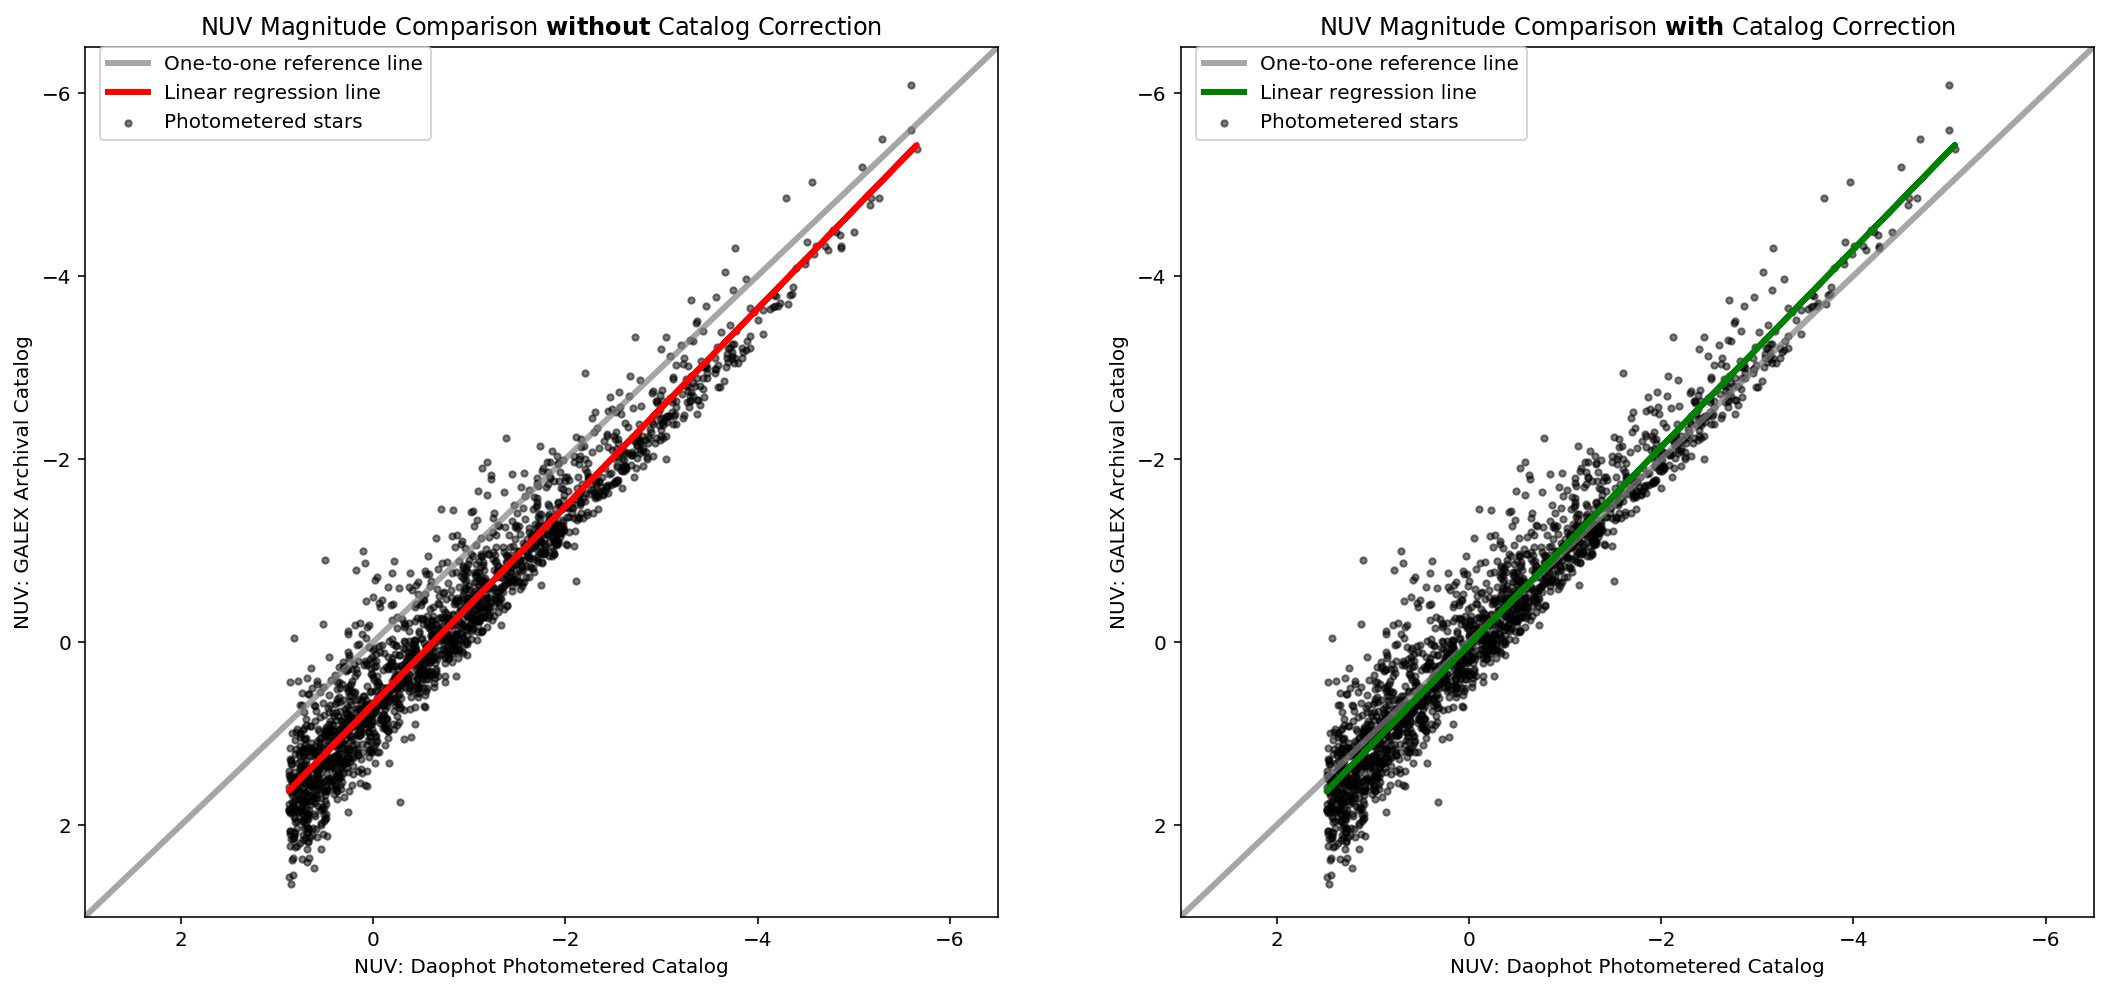

In [10]:
# Direct comparison
slope_uncorrected, intercept_uncorrected, r_value_uncorrected, p_value_uncorrected, std_err_uncorrected = \
stats.linregress(photometered_nuv, y)

slope_corrected, intercept_corrected, r_value_corrected, p_value_corrected, std_err_corrected = \
stats.linregress(x,y)

# Plot
plt.figure(figsize=(18, 8))

# Uncorrected
plt.subplot(121)
plt.scatter(photometered_nuv, y, color = 'black', s=10, label="Photometered stars", alpha=0.5)
plt.plot([-6.5,3],[-6.5,3], linewidth=3, color='grey', alpha=0.7, label="One-to-one reference line")
plt.plot(photometered_nuv,photometered_nuv*slope_uncorrected + intercept_uncorrected, linewidth=3, \
         label="Linear regression line", color='red')
smc.plt_parameters(r'NUV Magnitude Comparison $\mathbf{without}$ Catalog Correction', \
                   'NUV: Daophot Photometered Catalog', 'NUV: GALEX Archival Catalog', 3, -6.5, 3, -6.5, True)
plt.legend(bbox_to_anchor=(0.379, 1), loc=1, borderaxespad=0., prop={'size':10})

# Corrected
plt.subplot(122)
plt.scatter(x, y, color = 'black', s=10, label="Photometered stars", alpha=0.5)
plt.plot([-6.5,3],[-6.5,3], linewidth=3, color='grey', alpha=0.7, label="One-to-one reference line")
plt.plot(x,x*slope_corrected + intercept_corrected, linewidth=3, \
         label="Linear regression line", color='green')
smc.plt_parameters(r'NUV Magnitude Comparison $\mathbf{with}$ Catalog Correction', \
                   'NUV: Daophot Photometered Catalog', 'NUV: GALEX Archival Catalog', 3, -6.5, 3, -6.5, True)
plt.legend(bbox_to_anchor=(0.379, 1), loc=1, borderaxespad=0., prop={'size':10})

plt.show()

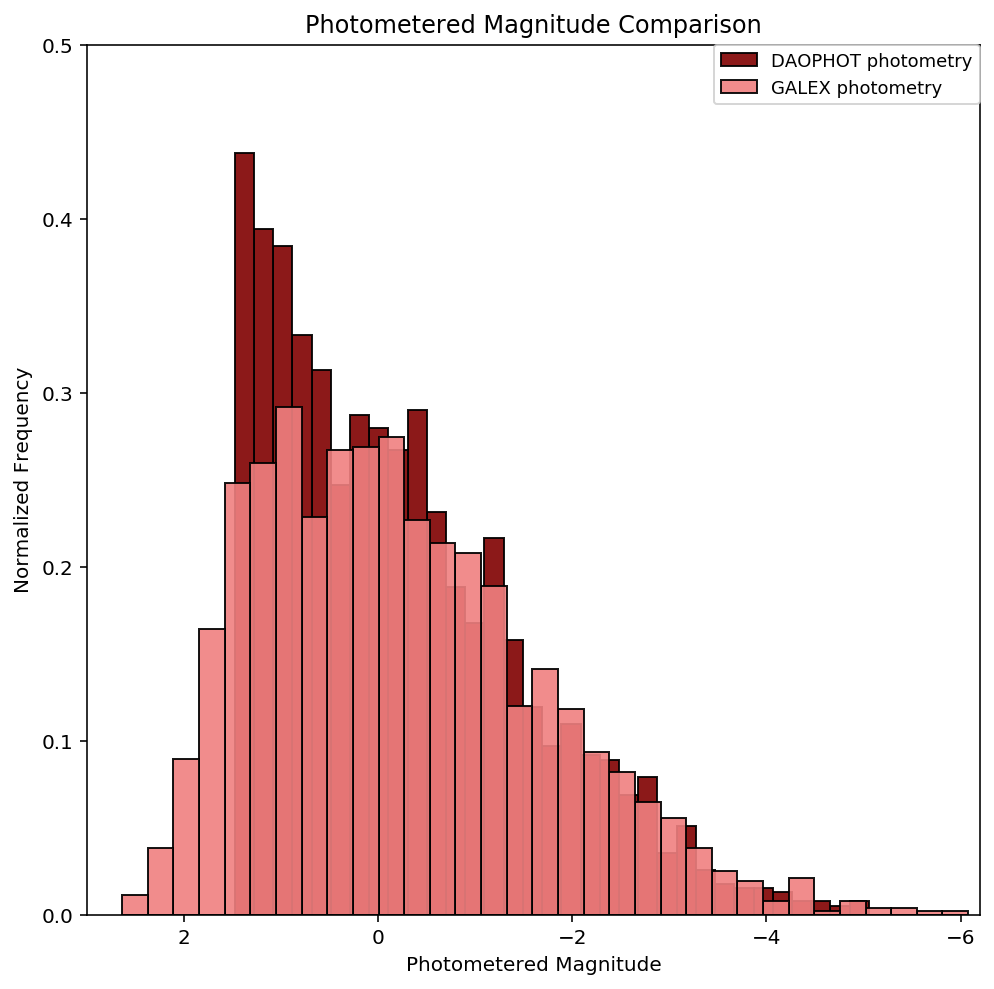

In [11]:
# Individual histograms
populations = [photometered_nuv, galex_nuv]
titles = ['DAOPHOT NUV Magnitudes', 'GALEX NUV Magnitudes']
labels = ['DAOPHOT photometry', 'GALEX photometry']
colors = ['firebrick', 'indianred']

plt.figure(figsize=(8, 8))

x = photometered_nuv + 0.6
y = galex_nuv
    
num_bins = int(len(x) / 60)
n, bins, patches = plt.hist(x, num_bins, density=True, color = 'maroon', \
                            edgecolor = 'k', label=labels[0], alpha = 0.9)
n, bins, patches = plt.hist(y, num_bins, density=True, color = 'lightcoral', \
                            edgecolor = 'k', label=labels[1], alpha = 0.9)

smc.plt_parameters('Photometered Magnitude Comparison', 'Photometered Magnitude', 'Normalized Frequency', 0, 0.5, 3, -6.2, True)

plt.show()